In [1]:
import os
import random
import numpy as np
import imageio.v2 as imageio
import imgaug as ia
import imgaug.augmenters as iaa
%matplotlib inline

## Load and show a random image

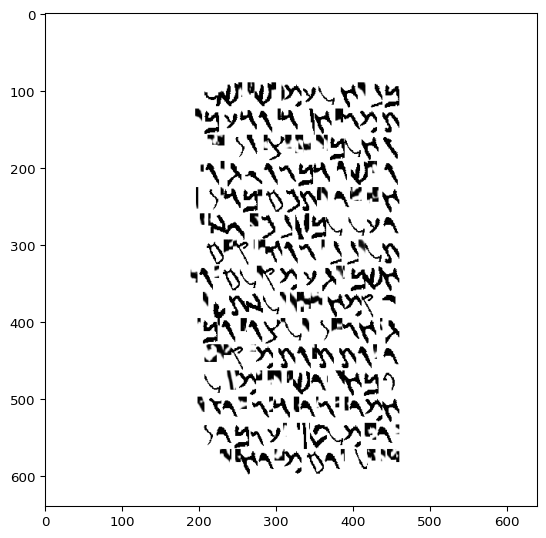

In [36]:
# choose a random directory and file
path = '../data/images/train'

# Filter the files that contain "crop" in the filename
filtered_files = [file for file in os.listdir(path) if "crop" in file]

random_file = random.choice(filtered_files)

# read and show image
img = imageio.imread(os.path.join(path, random_file))
ia.imshow(img)

Augmented image:


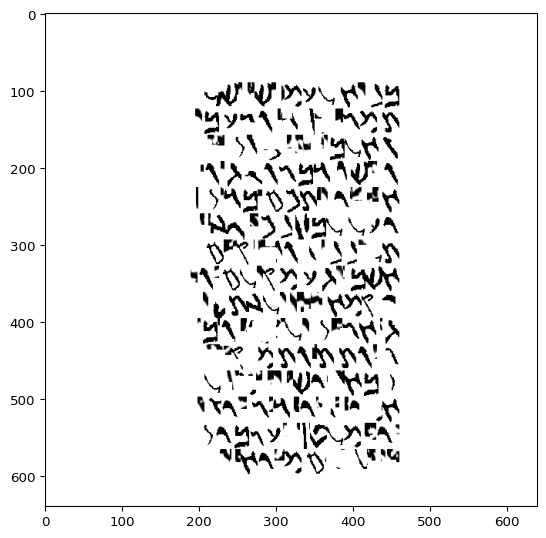

In [48]:
aug = iaa.Cutout(nb_iterations=(50, 100), size=(0.01, 0.05), squared=False,
                 fill_mode="constant", cval=255)

img_aug = aug(image=img)

# print("Original image:")
# ia.imshow(img)

print("Augmented image:")
ia.imshow(img_aug)

In [18]:
# Set the dropout parameters
dropout_probability = 0.05  # Adjust as needed

# Define custom dropout class to remove black pixels
class CustomDropout(iaa.meta.Augmenter):
    def __init__(self, dropout_probability=0, name=None, deterministic=False, random_state=None):
        super(CustomDropout, self).__init__(name=name, deterministic=deterministic, random_state=random_state)
        self.dropout_probability = dropout_probability

    def _augment_images(self, images, random_state, parents, hooks):
        result = []
        for image in images:
            mask = image == 0  # Create a mask for black pixels
            dropout_mask = random_state.random(mask.shape) < self.dropout_probability
            image[dropout_mask & mask] = 255  # Set black pixels to white
            result.append(image)
        return result

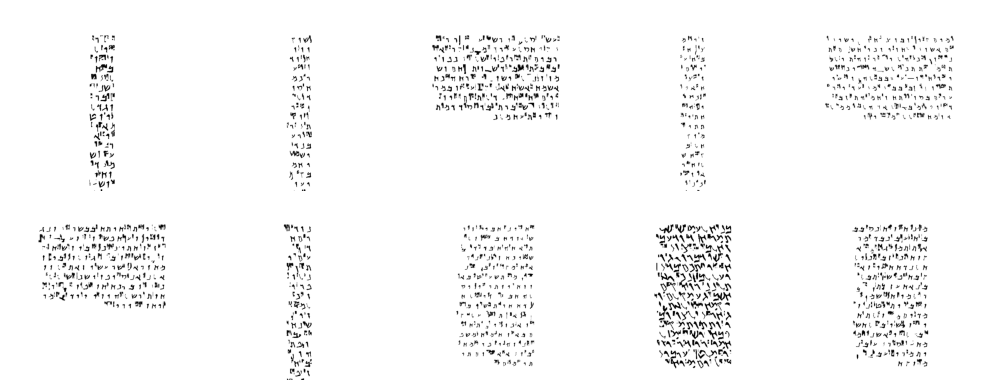

In [35]:
import matplotlib.pyplot as plt

# Read the images from the directory
path = '../data/images/train'
images = [imageio.imread(os.path.join(path, file)) for file in os.listdir(path) if file.startswith('sample') and 'crop' in file]

# Create a figure and axes
fig, axes = plt.subplots(2, 5, figsize=(10, 4))

# Iterate over the images and plot them
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()